# CIV1498 - Introduction to Data Science
## Project 2

## Prediction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Goal

In this project we will explore Airbnb data for the city of Toronto.

The data can be dounloaded from this link:
http://insideairbnb.com/get-the-data.html


# Setup Notebook

In [ ]:
# 3rd party imports
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import numpy as np


# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
listings_cleaned = pd.read_csv('/content/drive/MyDrive/Data_Science_Project_2/listings_cleaned.csv')
listings_cleaned = listings_cleaned.rename(columns={'id' : 'listing_id'})
listings_cleaned.head(3)

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,geometry,booked
0,23691,93825,100.0,93.0,f,2.0,t,Briar Hill-Belgravia,43.69805,-79.45411,...,4.73,4.82,4.90,4.93,4.34,4.73,t,1.73,POINT (-79.45411 43.69805),0
1,40456,174063,100.0,100.0,t,3.0,t,South Parkdale,43.63539,-79.44010,...,4.64,4.66,4.95,4.96,4.56,4.68,f,0.89,POINT (-79.4401 43.63539),156
2,41887,183071,100.0,83.0,t,2.0,t,Oakridge,43.69464,-79.28520,...,4.88,4.72,4.88,4.94,4.60,4.80,f,1.48,POINT (-79.2852 43.69464),27


# Choose features from the `listings` data to predict the average listing rent `price`

Let's see what columns we can use:

In [ ]:
listings_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13780 entries, 0 to 13779
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   13780 non-null  int64  
 1   host_id                      13780 non-null  int64  
 2   host_response_rate           13780 non-null  float64
 3   host_acceptance_rate         13780 non-null  float64
 4   host_is_superhost            13780 non-null  object 
 5   host_listings_count          13780 non-null  float64
 6   host_has_profile_pic         13780 non-null  object 
 7   neighbourhood_cleansed       13780 non-null  object 
 8   latitude                     13780 non-null  float64
 9   longitude                    13780 non-null  float64
 10  property_type                13780 non-null  object 
 11  room_type                    13780 non-null  object 
 12  accommodates                 13780 non-null  int64  
 13  bedrooms        

For the first try, we decide to use `neighborhood_cleansed`, `room_type`, `accommodates`, `bedrooms`, and `beds` as some features to predict the price.

In [ ]:
features_list = ['listing_id', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_cleansed', 'room_type',
                 'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 'reviews_per_month',
                 'availability_30', 'host_is_superhost', 'instant_bookable', 'host_has_profile_pic', 'price']

features_list_new = ['listing_id', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_cleansed', 'room_type', 'host_listings_count', 'minimum_nights',
                     'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value',
                     'reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                     'availability_30', 'availability_60', 'availability_90', 'availability_365', 'host_is_superhost',
                     'instant_bookable', 'host_has_profile_pic', 'price']

#features_list_property = ['listing_id', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_cleansed', 'host_listings_count', 'minimum_nights',
                  #   'accommodates', 'bedrooms', 'beds', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                   #  'review_scores_communication', 'review_scores_location', 'review_scores_value',
                   #  'reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                   #  'availability_30', 'availability_60', 'availability_90', 'availability_365', 'host_is_superhost',
                   #  'instant_bookable', 'host_has_profile_pic', 'price', 'property_type']

features_list_trimmed = ['listing_id', 'price', 'room_type', 'neighbourhood_cleansed', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_90',
                         'host_listings_count', 'review_scores_location']

features_df = listings_cleaned[features_list_trimmed]

features_df[['bedrooms', 'beds']] = features_df[['bedrooms', 'beds']].astype('int')
#features_df[['host_is_superhost', 'instant_bookable', 'host_has_profile_pic']] = np.where(features_df[['host_is_superhost', 'instant_bookable', 'host_has_profile_pic']]=='t', 1, 0)

features_df.head()

,listing_id,price,room_type,neighbourhood_cleansed,accommodates,bedrooms,beds,minimum_nights,availability_90,host_listings_count,review_scores_location
0,23691,72.0,Private room,Briar Hill-Belgravia,3,1,1,28,90,2.0,4.34
1,40456,100.0,Entire home/apt,South Parkdale,5,2,2,30,16,3.0,4.56
2,41887,70.0,Entire home/apt,Oakridge,2,0,1,28,63,2.0,4.60
3,43964,100.0,Private room,Wexford/Maryvale,4,2,2,2,89,1.0,4.83
4,44452,119.0,Entire home/apt,Rosedale-Moore Park,2,1,1,28,73,13.0,4.94


In [ ]:
listings_cleaned['price'].median()

2.0

In [ ]:
print(f"The number of unique entries in   {features_df['neighbourhood_cleansed'].name} is    {features_df['neighbourhood_cleansed'].unique().shape[0]}")
#print(f"The number of unique entries in   {features_df['property_type'].name} is             {features_df['property_type'].unique().shape[0]}")
print(f"The number of unique entries in   {features_df['room_type'].name} is                 {features_df['room_type'].unique().shape[0]}")

The number of unique entries in   neighbourhood_cleansed is    140
The number of unique entries in   room_type is                 4


As we can see, we cannot directly use `neighborhood_cleansed` and `room_type` columns since they contain non-numeric data, so we need to dummy-encode them using `one-hot-encoding`

In [ ]:
# Create dummy variables for "neighborhood" types
# Find uniqe "neighborhood" types
neighborhoods = features_df['neighbourhood_cleansed'].unique()

# Convert to category
neighborhoods_cat_type = pd.CategoricalDtype(categories=neighborhoods)

# Match each value to its category
features_df.loc[:, 'neighbourhood_cleansed'] = features_df.loc[:, 'neighbourhood_cleansed'].astype(neighborhoods_cat_type)

# Use pd.get_dummies to automaticaly one-hot-encode
features_df = pd.get_dummies(features_df, prefix='N', columns=['neighbourhood_cleansed'], drop_first=True)

In [ ]:
# Create dummy variables for "property" types
# Find uniqe "property" types
#properties = features_df['property_type'].unique()

# Convert to category
#properties_cat_type = pd.CategoricalDtype(categories=properties)

# Match each value to its category
#features_df.loc[:, 'property_type'] = features_df.loc[:, 'property_type'].astype(properties_cat_type)

# Use pd.get_dummies to automaticaly one-hot-encode
#features_df = pd.get_dummies(features_df, prefix='P', columns=['property_type'], drop_first=True)

In [ ]:
# Create dummy variables for "room" types
# Find uniqe "room" types
rooms = features_df['room_type'].unique()

# Convert to category
rooms_cat_type = pd.CategoricalDtype(categories=rooms)

# Match each value to its category
features_df.loc[:, 'room_type'] = features_df.loc[:, 'room_type'].astype(rooms_cat_type)

# Use pd.get_dummies to automaticaly one-hot-encode
features_df = pd.get_dummies(features_df, prefix='R', columns=['room_type'], drop_first=True)

### Drop overfitting features

Drop the features that have more than 95% same values for all the data

In [ ]:
#overfit = []

#for col in features_df.columns:
#    counts = features_df[col].value_counts()
#    zeros = counts.iloc[0]
#    if zeros / len(features_df) * 100 > 95:
#        overfit.append(col)

#features_df = features_df.drop(columns=overfit)

In [ ]:
features_df.shape

(13780, 151)

In [ ]:
features_df.head()

,listing_id,price,accommodates,bedrooms,beds,minimum_nights,availability_90,host_listings_count,review_scores_location,N_South Parkdale,...,N_Forest Hill North,N_Milliken,N_Maple Leaf,N_Humbermede,N_Centennial Scarborough,N_Humber Summit,N_Rustic,R_Entire home/apt,R_Shared room,R_Hotel room
0,23691,72.0,3,1,1,28,90,2.0,4.34,0,...,0,0,0,0,0,0,0,0,0,0
1,40456,100.0,5,2,2,30,16,3.0,4.56,1,...,0,0,0,0,0,0,0,1,0,0
2,41887,70.0,2,0,1,28,63,2.0,4.60,0,...,0,0,0,0,0,0,0,1,0,0
3,43964,100.0,4,2,2,2,89,1.0,4.83,0,...,0,0,0,0,0,0,0,0,0,0
4,44452,119.0,2,1,1,28,73,13.0,4.94,0,...,0,0,0,0,0,0,0,1,0,0


# Modeling
Here we will create a regression model for predicting the price.

We should do `train_test_split`

We should do `scaling`

We can use `GridSearchCV`

We can use `selectKfeatures`

...

### Split the data in such a way that every row from the same listing are together

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(features_df, test_size=0.2, random_state=0, shuffle=True) 

# Print results
print('Train:    {}%'.format(round(train.shape[0] / features_df.shape[0] * 100, 1)))
print('Test:     {}%'.format(round(test.shape[0] / features_df.shape[0] * 100, 1)))

Train:    80.0%
Test:     20.0%


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()

# Creat X and y
X_train = train.drop(columns=['listing_id', 'price'])
#X_train = scaler.fit_transform(X_train)
y_train = train['price']

X_test = test.drop(columns=['listing_id', 'price'])
#X_test = scaler.fit_transform(X_test)
y_test = test['price']

In [ ]:
#importing a test set in pickle for the tKinter model:
stest2=X_test[:1]
test_obj=stest2

file_to_store= open('test.pickle', 'wb')
pkl.dump(test_obj, file_to_store)
file_to_store.close()

In [ ]:
# Import scoring functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

def rmse(y_true, y_pred):
  rmse = (mean_squared_error(y_true, y_pred))**0.5
  return rmse

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Instantiate a LinearRegression Model
linear_model = LinearRegression(fit_intercept=True, normalize=False, n_jobs=-1)

# Instantiate a Lasso Model
lasso = Lasso(alpha=1, fit_intercept=True, normalize=False)

# Instantiate a Ridge Model
ridge = Ridge(alpha=1, fit_intercept=True, normalize=False)

# Instantiate a ElasticNet Model
elasticnet = ElasticNet(alpha=1, l1_ratio=0.5, fit_intercept=True, normalize=False)

# Instantiate a GradientBoostingRegressor Model
gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=1000, 
                               min_samples_split=4, min_samples_leaf=1, max_depth=2,
                               min_impurity_decrease=0.0, validation_fraction=0.1)

#gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.001, n_estimators=2000, 
                               # min_samples_split=4, min_samples_leaf=1, max_depth=10,
                               # min_impurity_decrease=0.0, validation_fraction=0.1)

# Instantiate a DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [ ]:
# Fit the model to the train data

for model in [linear_model, lasso, ridge, elasticnet, gbr]:

  model.fit(X_train, y_train)

  y_fitted = model.predict(X_train)
  y_pred = model.predict(X_test)

  print(f"Scores for:           {model}")

  print(f"RMSE for Training:    {round(rmse(y_train, y_fitted), 3)}")
  print(f"RMSE for Testing:     {round(rmse(y_test, y_pred), 3)}")
  
  print()
  
  print(f"R^2 for Training:     {round(model.score(X_train, y_train), 3)}")
  print(f"R^2 for Testing:      {round(model.score(X_test, y_test), 3)}")

  print('-------------------------------------------------------')

Scores for:           LinearRegression(n_jobs=-1, normalize=False)
RMSE for Training:    44.287
RMSE for Testing:     44.741

R^2 for Training:     0.527
R^2 for Testing:      0.521
-------------------------------------------------------
Scores for:           Lasso(alpha=1, normalize=False)
RMSE for Training:    47.067
RMSE for Testing:     47.315

R^2 for Training:     0.466
R^2 for Testing:      0.464
-------------------------------------------------------
Scores for:           Ridge(alpha=1, normalize=False)
RMSE for Training:    44.29
RMSE for Testing:     44.74

R^2 for Training:     0.527
R^2 for Testing:      0.521
-------------------------------------------------------
Scores for:           ElasticNet(alpha=1, normalize=False)
RMSE for Training:    50.386
RMSE for Testing:     50.55

R^2 for Training:     0.388
R^2 for Testing:      0.389
-------------------------------------------------------
Scores for:           GradientBoostingRegressor(max_depth=2, min_samples_split=4, n_e

In [ ]:
y_predicted = y_pred
y_actual = y_test

visualization_df = pd.DataFrame({'Predicted Values':y_predicted, 'Actual Values':y_actual})

visualization_df['Absolute Error'] = np.abs(visualization_df['Predicted Values'] - visualization_df['Actual Values'])

visualization_df = visualization_df.sort_values(by='Absolute Error', ascending=False)

less_25 =  visualization_df[visualization_df['Absolute Error']<=25]
less_50 =  visualization_df[(visualization_df['Absolute Error']>25) & (visualization_df['Absolute Error']<=50)]
less_75 =  visualization_df[(visualization_df['Absolute Error']>50) & (visualization_df['Absolute Error']<=75)]
less_100 = visualization_df[(visualization_df['Absolute Error']>75) & (visualization_df['Absolute Error']<=100)]
less_150 = visualization_df[(visualization_df['Absolute Error']>100) & (visualization_df['Absolute Error']<=150)]
less_200 = visualization_df[(visualization_df['Absolute Error']>150) & (visualization_df['Absolute Error']<=200)]
more_200 = visualization_df[visualization_df['Absolute Error']>200]

visualization_df.head()

,Predicted Values,Actual Values,Absolute Error
4447,69.587782,288.0,218.412218
9981,85.071929,300.0,214.928071
4134,92.177068,300.0,207.822932
2917,109.102231,300.0,190.897769
2607,112.530455,295.0,182.469545


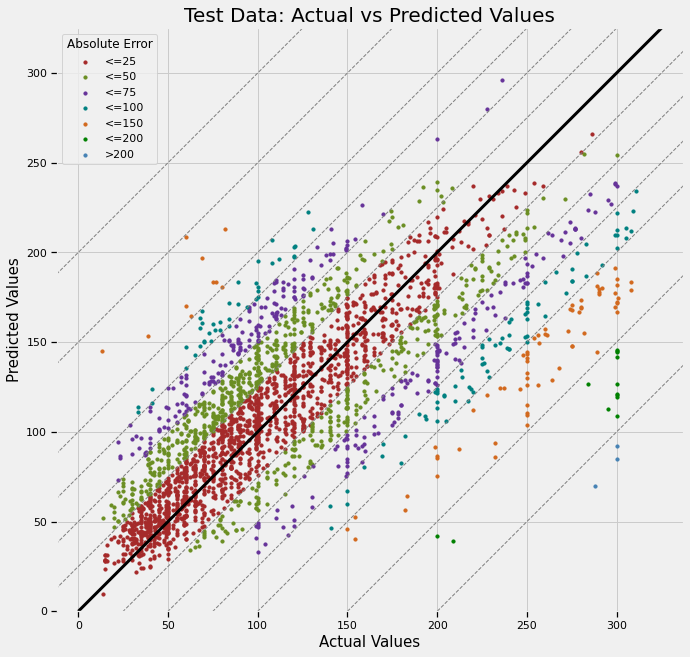

In [ ]:
plt.figure(figsize=(10,10))

plt.title('Test Data: Actual vs Predicted Values', fontsize=20)

plt.scatter(data=less_25,  x='Actual Values', y='Predicted Values', c='brown', s=10, label='<=25')
plt.scatter(data=less_50,  x='Actual Values', y='Predicted Values', c='olivedrab', s=10, label='<=50')
plt.scatter(data=less_75,  x='Actual Values', y='Predicted Values', c='rebeccapurple', s=10, label='<=75')
plt.scatter(data=less_100, x='Actual Values', y='Predicted Values', c='teal', s=10, label='<=100')
plt.scatter(data=less_150, x='Actual Values', y='Predicted Values', c='chocolate', s=10, label='<=150')
plt.scatter(data=less_200, x='Actual Values', y='Predicted Values', c='green', s=10, label='<=200')
plt.scatter(data=more_200, x='Actual Values', y='Predicted Values', c='steelblue', s=10, label='>200')

#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test), 325)
p2 = min(min(y_pred), min(y_test), 0)

plt.plot([p1, p2], [p1, p2], linewidth=3, color='black')

for val in [25, 50, 75, 100, 150, 200]:

  plt.plot([p1+val, p2+val], [p1, p2], linewidth=1, color='grey', linestyle='dashed')
  plt.plot([p1-val, p2-val], [p1, p2], linewidth=1, color='grey', linestyle='dashed')

plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)

plt.axis('equal')

plt.xlim(p2, p1)
plt.ylim(p2, p1)

plt.legend(title = "Absolute Error")
plt.show()

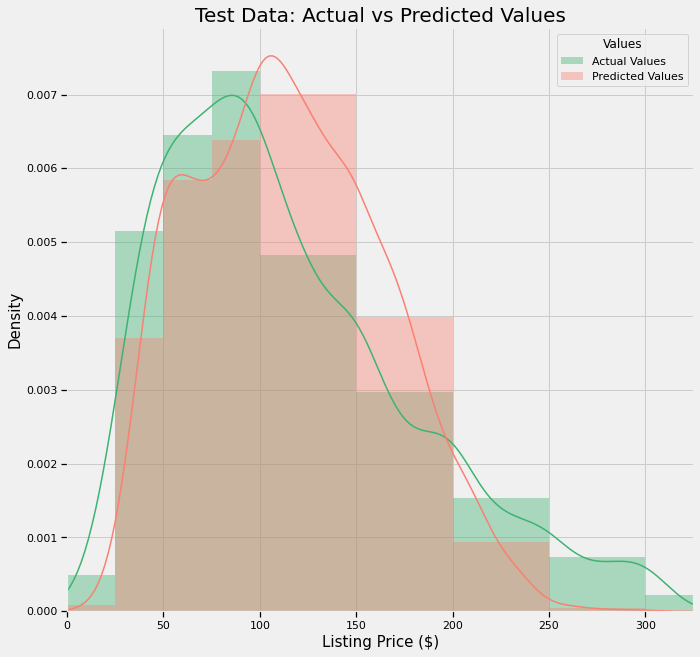

In [ ]:
plt.figure(figsize=(10,10))

plt.title('Test Data: Actual vs Predicted Values', fontsize=20)

sns.distplot(visualization_df['Actual Values'], hist=True, kde=True, rug=False, color='mediumseagreen',
             norm_hist=True, label='Actual Values', bins=[0, 25, 50, 75, 100, 150, 200, 250, 300, 350])

sns.distplot(visualization_df['Predicted Values'], hist=True, kde=True, rug=False, color='salmon',
             norm_hist=True, label='Predicted Values', bins=[0, 25, 50, 75, 100, 150, 200, 250, 300, 350])

plt.xlabel('Listing Price ($)', fontsize=15)
plt.ylabel('Density', fontsize=15)

plt.xlim(0, 325)

plt.legend(title = "Values")
plt.show()

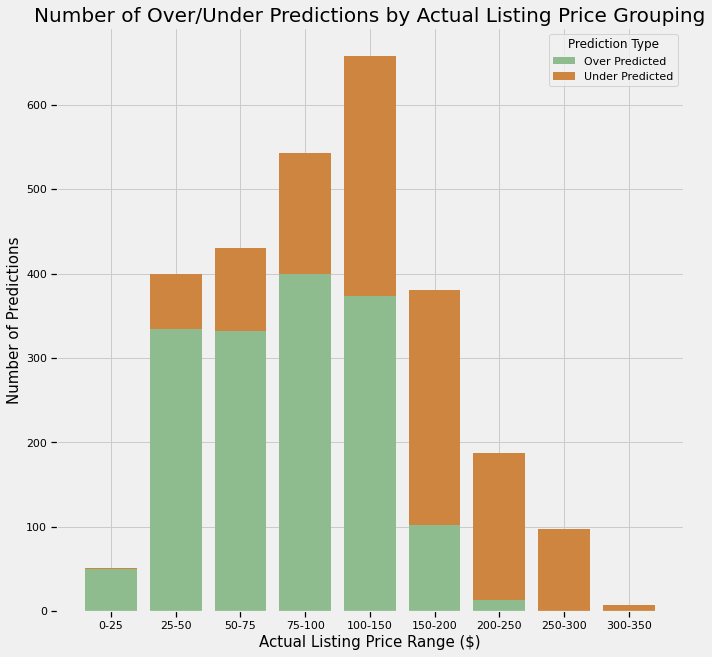

In [ ]:
count_df = visualization_df.copy()

over_25 = count_df[(count_df['Actual Values'] <= 25) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_25 = count_df[(count_df['Actual Values'] <= 25) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_50 = count_df[(count_df['Actual Values'] > 25) & (count_df['Actual Values'] <= 50) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_50 = count_df[(count_df['Actual Values'] > 25) & (count_df['Actual Values'] <= 50) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_75 = count_df[(count_df['Actual Values'] > 50) & (count_df['Actual Values'] <= 75) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_75 = count_df[(count_df['Actual Values'] > 50) & (count_df['Actual Values'] <= 75) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_100 = count_df[(count_df['Actual Values'] > 75) & (count_df['Actual Values'] <= 100) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_100 = count_df[(count_df['Actual Values'] > 75) & (count_df['Actual Values'] <= 100) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_150 = count_df[(count_df['Actual Values'] > 100) & (count_df['Actual Values'] <= 150) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_150 = count_df[(count_df['Actual Values'] > 100) & (count_df['Actual Values'] <= 150) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_200 = count_df[(count_df['Actual Values'] > 150) & (count_df['Actual Values'] <= 200) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_200 = count_df[(count_df['Actual Values'] > 150) & (count_df['Actual Values'] <= 200) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_250 = count_df[(count_df['Actual Values'] > 200) & (count_df['Actual Values'] <= 250) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_250 = count_df[(count_df['Actual Values'] > 200) & (count_df['Actual Values'] <= 250) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_300 = count_df[(count_df['Actual Values'] > 250) & (count_df['Actual Values'] <= 300) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_300 = count_df[(count_df['Actual Values'] > 250) & (count_df['Actual Values'] <= 300) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

over_350 = count_df[(count_df['Actual Values'] > 300) & (count_df['Actual Values'] <= 350) & (count_df['Predicted Values'] > count_df['Actual Values'])].count()[0]
under_350 = count_df[(count_df['Actual Values'] > 300) & (count_df['Actual Values'] <= 350) & (count_df['Predicted Values'] < count_df['Actual Values'])].count()[0]

count_df = pd.DataFrame({'Over Predicted':[over_25, over_50, over_75, over_100, over_150, over_200, over_250, over_300, over_350],
                         'Under Predicted':[under_25, under_50, under_75, under_100, under_150, under_200, under_250, under_300, under_350]})

count_df

plt.figure(figsize=(10,10))

plt.title('Number of Over/Under Predictions by Actual Listing Price Grouping', fontsize=20)

plt.bar(x=['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300-350'],
        height=count_df['Over Predicted'], color='darkseagreen', label='Over Predicted')

plt.bar(x=['0-25', '25-50', '50-75', '75-100', '100-150', '150-200', '200-250', '250-300', '300-350'],
        height=count_df['Under Predicted'], color='peru', label='Under Predicted', bottom=count_df['Over Predicted'])

plt.xlabel('Actual Listing Price Range ($)', fontsize=15)
plt.ylabel('Number of Predictions', fontsize=15)

plt.legend(title = "Prediction Type")
plt.show()

In [ ]:
!pip install eli5
import eli5



In [ ]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gbr, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, top=features_df.drop(columns=['listing_id', 'price']).shape[1], feature_names=features_df.drop(columns=['listing_id', 'price']).columns.tolist())

Weight,Feature
0.1337 ± 0.0149,R_Entire home/apt
0.1260 ± 0.0168,accommodates
0.1257 ± 0.0076,bedrooms
0.1031 ± 0.0099,N_Waterfront Communities-The Island
0.0715 ± 0.0083,availability_90
0.0440 ± 0.0044,minimum_nights
0.0231 ± 0.0038,host_listings_count
0.0210 ± 0.0012,N_Bay Street Corridor
0.0181 ± 0.0037,review_scores_location
0.0124 ± 0.0040,N_Church-Yonge Corridor


It seems that the `GradientBoostingRegressor` model is doing the best, so we can try tuning its hyper parameters using `GridSearchCV`

In [ ]:
parameters = [{'n_estimators':[1000,1500,2000]},
             {'min_samples_split':[2, 4, 5]},
             {'max_depth':[2, 4]}]

#parameters = [{'n_estimators':[55]},
              #{'min_samples_split':[140]},
              #{'max_depth':[2, 4]}]

#parameters = [{'n_estimators':[50,150,200]},
              #{'min_samples_split':[2, 4, 5]},
              #{'max_depth':[2, 4]}]

grid_search = GridSearchCV(estimator = gbr,
                          param_grid = parameters,
                          scoring = 'neg_root_mean_squared_error',
                          cv=5,
                          verbose=0)

grid_search.fit(X_train, y_train)

y_fitted = grid_search.predict(X_train)
y_pred = grid_search.predict(X_test)

In [ ]:
grid_search.best_score_

-42.43718044138514

In [ ]:
grid_search.best_estimator_

GradientBoostingRegressor(max_depth=2, min_samples_split=4, n_estimators=2000)

In [ ]:
print(f"Scores for:           {grid_search}")

print()

print(f"RMSE for Training:    {round(rmse(y_train, y_fitted), 3)}")
print(f"RMSE for Testing:     {round(rmse(y_test, y_pred), 3)}")
  
print()
  
print(f"R^2 for Training:     {round(grid_search.score(X_train, y_train), 3)}")
print(f"R^2 for Testing:      {round(grid_search.score(X_test, y_test), 3)}")

print('------------------i-------------------------------------')

Scores for:           GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=2,
                                                 min_samples_split=4,
                                                 n_estimators=1000),
             param_grid=[{'n_estimators': [1000, 1500, 2000]},
                         {'min_samples_split': [2, 4, 5]},
                         {'max_depth': [2, 4]}],
             scoring='neg_root_mean_squared_error')

RMSE for Training:    40.131
RMSE for Testing:     42.224

R^2 for Training:     -71.192
R^2 for Testing:      -70.301
------------------i-------------------------------------


In [ ]:
#Import GBR model by pickle

import pickle as pkl
an_obj=model

file_to_store= open('model.pickle', 'wb')
pkl.dump(an_obj, file_to_store)
file_to_store.close()


In [ ]:
import pickle
print (pickle.format_version)

4.0
